# **House Price Prediction with Machine Learning**

## **Step 1: Exploratory Data Analysis (EDA)**

### Load in Data and Explore

First we will load in the datasets provided and take a look to see what we're working with. The datasets have already been split into training and testing which we will read in now.

In [356]:
# Import necessary libraries
import pandas as pd

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Training set: {train.shape}")
print(f"Testing set: {test.shape}")

Training set: (1460, 81)
Testing set: (1459, 80)


Our target variable that we want to predict is going to be the `SalePrice`, or the price that the house was sold at in USD. Let's look at a histogram of sale price.

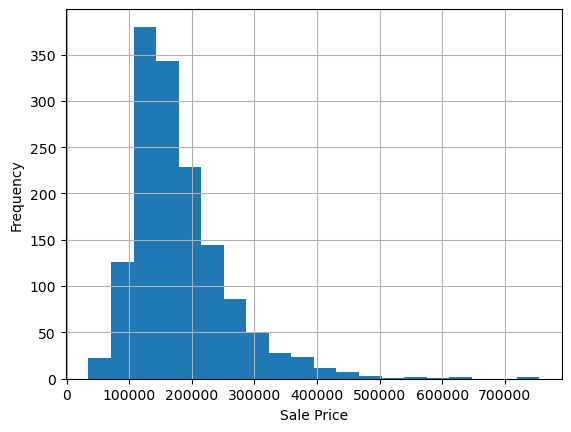

In [357]:
# Histogram of the target variable, SalePrice
import matplotlib.pyplot as plt
plt.hist(train['SalePrice'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

It looks like we have 1460 observatings to train our model with 79 explanatory columns (as the first is simply id). Let's see these columns.

In [358]:
print(train.drop(['Id', 'SalePrice'], axis=1).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

It looks like we have a range of data types we will be working with, including integers, float values, and object values. Let's look at these columns to see if we have any missing data.

In [359]:
# Print out missing values if not zero
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


We have a few columns here containing missing values. Some such as `Electrical` only have one, but some like `Alley`, `PoolQC`, `Fence`, and `MiscFeature` have most of them missing with only a few values present. We will decide what to do with these in Step 2.

### Correlations

In [360]:
# See which columns are highly correlated with SalePrice

# Select only numeric columns
numeric_train = train.select_dtypes(include=['number'])

# See which columns are highly correlated with SalePrice
correlation = numeric_train.corr()
correlation = correlation['SalePrice'].sort_values(ascending=False)
print(correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

It looks as if `OverallQual` has the highest correlation with the sales price, which makes a lot of sense. The higher the quality of a house, the more it will sell by. Some over higher correlations with the sale price include `GrLivArea` (Above ground living area square footage), `GarageCars` (how many cars can fit in garage), `GarageArea`, `TotalBsmtSF` (basement square footage), and `1stFlrSF` (square footage of first floor).

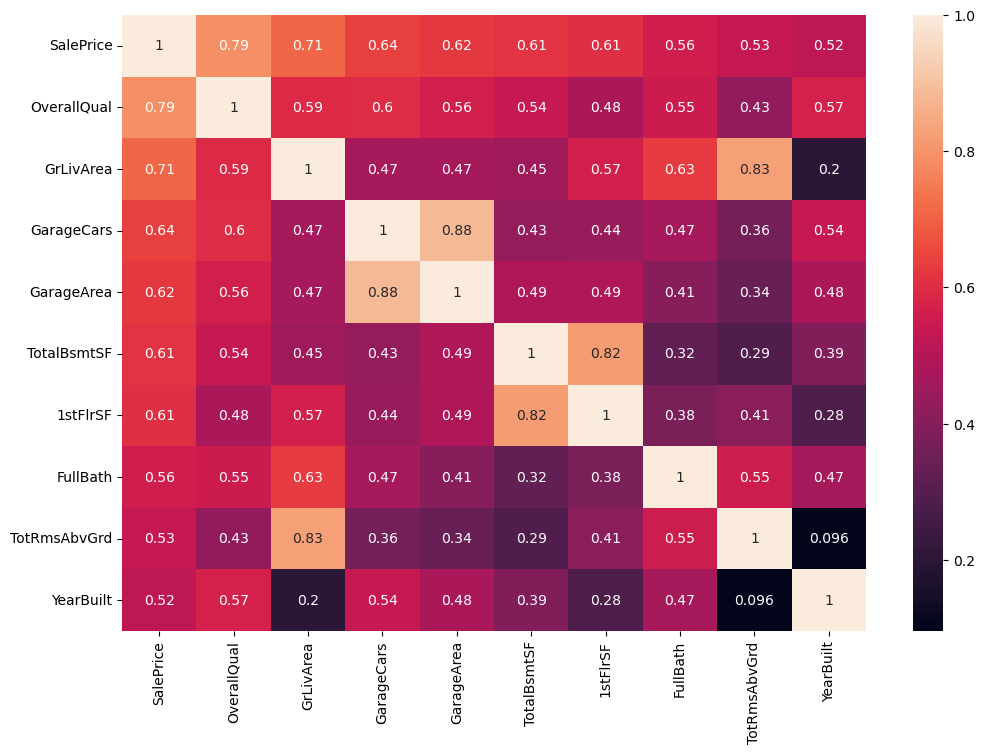

In [361]:
# Show a heatmap for some of the higher correlated columns
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']].corr(), annot=True)
plt.show()

We can also learn from this correlation matrix that features such as `GarageCars` and `GarageArea` are highly correlated (understandably) and might not need to use both in our final model. We will also cover this later.

/Users/ethan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ethan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ethan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ethan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

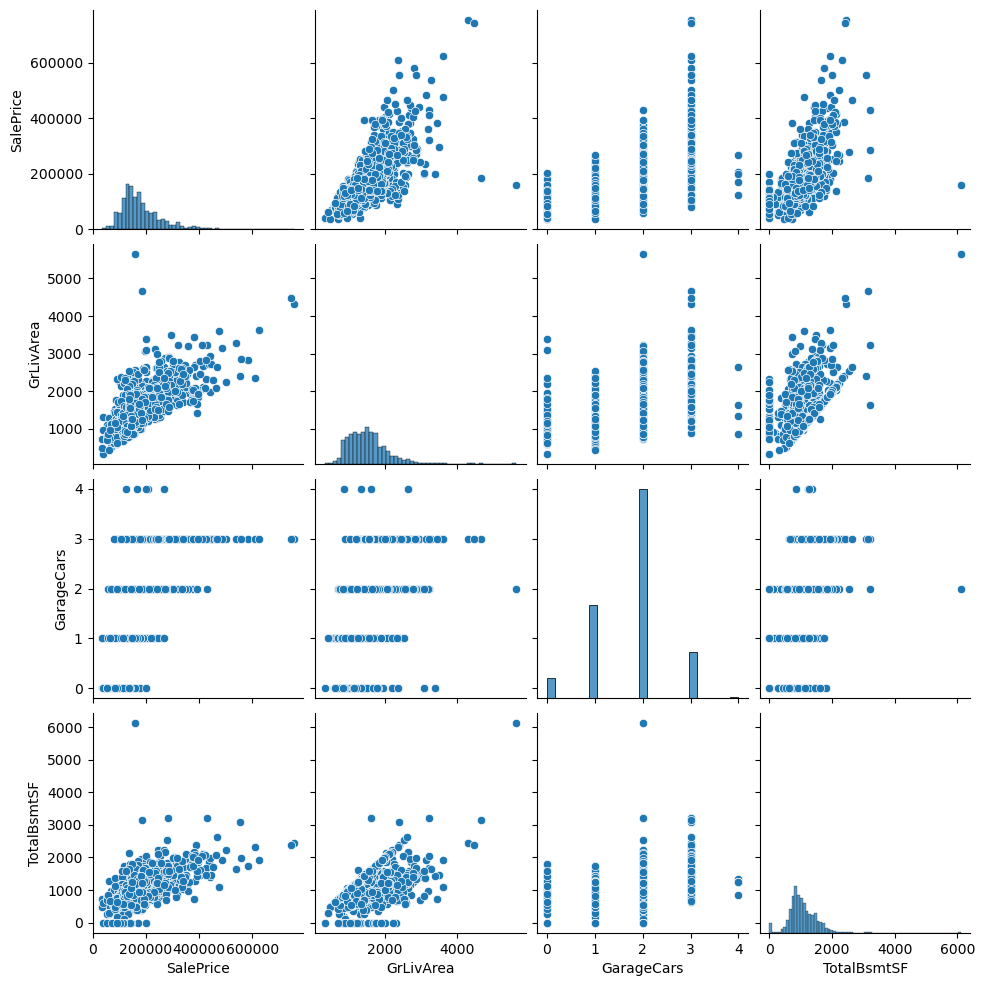

In [362]:
# Scatterplot matrix of SalePrice vs. GrLivArea, OverallQual, GarageCars and TotalBsmtSF
sns.pairplot(train[['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']])
plt.show()

### Outliers

Finally, let's see if we can identify any outliers that may cause issues in our data

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mean: 180921.2
Median: 163000.0
        Id  SalePrice  GrLivArea  OverallQual
523    524     184750       4676           10
691    692     755000       4316           10
1182  1183     745000       4476           10
1298  1299     160000       5642           10


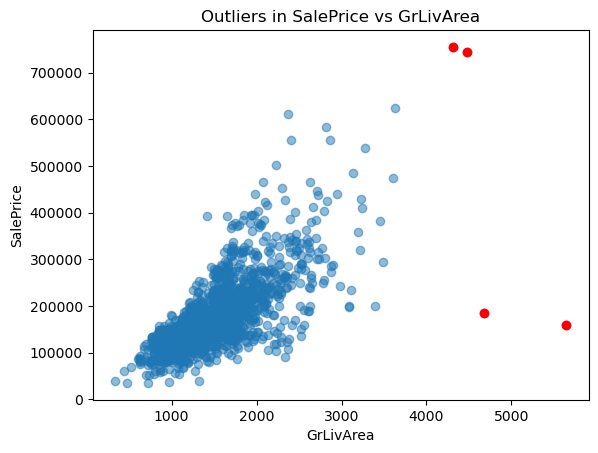

In [363]:
# Identiy outliers
print(train['SalePrice'].describe())

price_mean = train['SalePrice'].mean()
price_median = train['SalePrice'].median()
print(f"\nMean: {round(price_mean, 2)}")
print(f"Median: {price_median}")

outliers = train[(train['SalePrice'] > 700000) | (train['GrLivArea'] > 4000)]

# Print outliers
print(outliers[['Id', 'SalePrice', 'GrLivArea', 'OverallQual']])

# Visualize outliers
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)
plt.scatter(outliers['GrLivArea'], outliers['SalePrice'], color='red')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Outliers in SalePrice vs GrLivArea')
plt.show()



There are four points that seem to be extreme outliers in our data given `SalePrice` and `GrLivArea`. Let's remove these observations to make it easier for our model to predict.

In [364]:
# Remove outliers
#train = train.drop(outliers.index)
print(train['SalePrice'].describe())
print(train['SalePrice'].median())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
163000.0


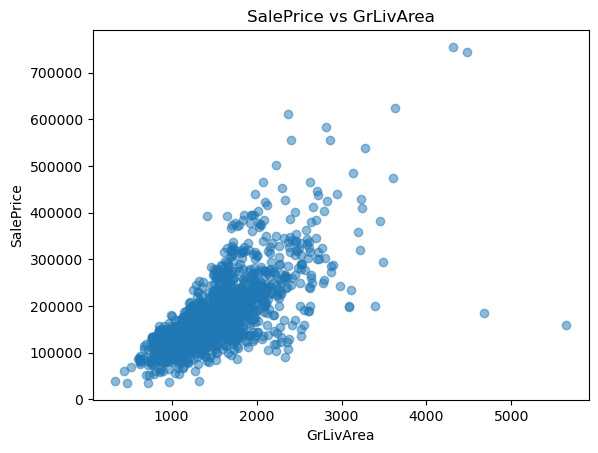

In [365]:
# Plot SalePrice vs. GrLivArea after removing outliers
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.show()

In [366]:
# Print shapes of training and testing sets
print(f"Training set: {train.shape}")
print(f"Testing set: {test.shape}")

Training set: (1460, 81)
Testing set: (1459, 80)


## **Step 2: Data Preprocessing**

Let's start by looking at the columns separated by datatype to see how we can preprocess this data for testing. First we will combine training and testing sets to preprocess, and we will split them again at the end.

In [367]:
# Combine training and testing sets and set column to remember which rows are from the training set
train['training_set'] = True
test['training_set'] = False
dataset = pd.concat([train, test], axis=0, sort=False)
print(dataset.shape)

(2919, 82)


### Dealing with Missing Values

In [368]:
# Find all the columns with data type integer
print(dataset.select_dtypes(include=['int64']).columns)

# Create train dataframe with only integer columns along with id
data_int = dataset.select_dtypes(include=['int64'])
print(data_int.isna().sum())

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


It looks like we have no integer columns with missing values! Let's now look at columns of type float.

In [369]:
# Find all the columns with data type float
print(dataset.select_dtypes(include=['float64']).columns)

# Create train dataframe with only float columns and id
data_float = dataset[['Id'] + dataset.select_dtypes(include=['float64']).columns.tolist()]
print("\n", data_float.isna().sum())

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

 Id                 0
LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64


There are a lot of missing values for:

- `LotFrontage`: Linear feet of street connected to property<br>
- `MasVnrArea`: Masonry veneer area in square feet<br>
- `GarageYrBlt`: Year garage was built

We will use the KNN imputation to fill in these missing values, as well as the missing values for the other columns with missing value(s). The `KNNImputer` class from the `sklearn.impute` module can be used for this purpose. KNN imputation works by finding the k-nearest neighbors for each missing value and imputing it with the mean (or median) of those neighbors.




In [370]:
# Fill in missing values with KNNImputer
from sklearn.impute import KNNImputer

# Select the columns to impute
columns_to_impute = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the selected columns
dataset[columns_to_impute] = knn_imputer.fit_transform(dataset[columns_to_impute])

# Verify that there are no missing values left in the selected columns
print(dataset[columns_to_impute].isnull().sum())

LotFrontage     0
MasVnrArea      0
GarageYrBlt     0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
dtype: int64


We have successfully gotten rid of all of the missing values in the float columns. Finally, let's look at the object columns. This one is going to take a little more thought.

In [371]:
# Finally all the columns with data type object
print(dataset.select_dtypes(include=['object']).columns)

# Print missing values in object columns
missing_values = dataset.select_dtypes(include=['object']).isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157

Columns `MSZoning`, `Utilities`, `Exterior1st`, `Exterior2nd`, `Electrical`, `KitchenQual`, `Functional`, and `SaleType` only have a few missing values. For these, we will impute with the mode, or the most frequent value, of those columns.

In [372]:
# Impute mode for above columns
columns_to_impute_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']
dataset[columns_to_impute_mode] = dataset[columns_to_impute_mode].fillna(dataset.mode().iloc[0])

In [373]:
missing_values = dataset.select_dtypes(include=['object']).isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Alley           2721
MasVnrType      1766
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64


Looking at the data descriptions for the remaining features with missing values, if there is no data listed, it means that feature is not present in the house. For example, if there is a missing value for `GarageQual`, it means there is no garage, or if there is a missing value for `MiscFeature`, it means there are no miscellaneous features present.

We will set these values to the string 'NA' instead of no value listed.

In [374]:
# Impute 'NA' for missing values in object columns
dataset = dataset.fillna('NA')

In [375]:
# Verify that there are no missing values left - we want output 0.0
print(dataset.isnull().sum().sum())

0


### Feature Encoding

There are no missing values remaining. Now we can proceed with encoding the categorical columns. We will use one-hot encoding for this purpose.

Ordinal categorical data will be handeled with label encoding. These include `Utilities`, `LandSlope`, `HeatingQC`, `FireplaceQu`, `KitchenQual`, `BsmtCond`, `GarageCond`, `PoolQC`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, and `Functional`.

In [376]:
# Save ordinal categorical columns to a list
ordinal_categorical = ['Utilities', 'LandSlope', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'BsmtCond', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'ExterQual', 'ExterCond', 'BsmtQual', 'GarageQual']

# Use label encoding for these columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in ordinal_categorical
for col in ordinal_categorical:
    dataset[col] = label_encoder.fit_transform(dataset[col])


In [377]:
# Show example of label encoding
print(dataset['LandSlope'].value_counts())

LandSlope
0    2778
1     125
2      16
Name: count, dtype: int64


Now for the nominal categorical features, we will use One-Hot Encoding. These columns include `MSSubClass`, `MSZoning`, `Street`, `LotConfig`, `Neighborhood`, `Condition1`, `Condition2`, `RoofMatl`, `RoofStyle`, `Exterior1st`, `Exterior2nd`, `Foundation`, `Heating`, `GarageType`, `SaleType`, `SaleCondition`, `LandContour`, `LotConfig`, `GarageFinish`, `PavedDrive`, `Fence`, and `MiscFeature`.

In [378]:
#Create a list of nominal categorical columns
nominal_categorical = ['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofMatl', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'GarageType', 'SaleType', 'SaleCondition', 'LandContour', 'LotConfig', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'Alley', 'LotShape', 'BldgType', 'HouseStyle', 'MasVnrType', 'CentralAir', 'Electrical']

# Use one-hot encoding for these columns
dataset = pd.get_dummies(dataset, columns=nominal_categorical, dtype=int)

Out dataset now has a column for each nominal categorical data feature with a `1` if it applies and a `0` if not. Here's an example:

In [379]:
# Show example of one-hot encoding
print(dataset[['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40']].head())

print(dataset.shape)

   MSSubClass_20  MSSubClass_30  MSSubClass_40
0              0              0              0
1              1              0              0
2              0              0              0
3              0              0              0
4              0              0              0
(2919, 260)


### Feature Engineering

#### Create new features

Let's create some of our own features to generate possible new insights. We will start with more basic numeric features like one for the total square footage of all the floors combined, the age of the property, and total bathrooms.

In [380]:
# New feature for property age
dataset['PropertyAge'] = dataset['YrSold'] - dataset['YearBuilt']

# New feature for total area of the house
dataset['TotalArea'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

# New feature for total number of bathrooms
dataset['TotalBathrooms'] = dataset['FullBath'] + 0.5 * dataset['HalfBath'] + dataset['BsmtFullBath'] + 0.5 * dataset['BsmtHalfBath']

We can also add features for different ameneties, such as a fireplace or a pool.

In [381]:
# New feature for has pool
dataset['HasPool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# New feature for has garage
dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# New feature for has fireplace
dataset['HasFireplace'] = dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Finally, we can add a feature for the overall grade given to the property. This can be a custom grade calculated by multiplying the overall quality by the overall condition.

In [382]:
# New feature for OverallGrade
dataset['OverallGrade'] = dataset['OverallQual'] * dataset['OverallCond']

#### Remove highly correlated features

We will then avoid multicollinearity by removing highly correlated features. Let's generate a list of features that are highly correlated, and drop one of the features in each tuple. We will use a threshold of `0.9`.

In [383]:
corr_matrix = dataset.drop(['training_set', 'SalePrice'], axis=1).corr().abs()
unique_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
print([(feature1, feature2, corr) for (feature1, feature2), corr in unique_corr_pairs.items() if corr > 0.9])

[('GarageType_NA', 'HasGarage', 1.0000000000000004), ('Street_Grvl', 'Street_Pave', 1.0), ('LotConfig_FR3', 'LotConfig_FR3', 1.0), ('MSSubClass_90', 'BldgType_Duplex', 1.0), ('LotConfig_FR2', 'LotConfig_FR2', 1.0), ('LotConfig_CulDSac', 'LotConfig_CulDSac', 1.0), ('LotConfig_Corner', 'LotConfig_Corner', 1.0), ('LotConfig_Inside', 'LotConfig_Inside', 1.0), ('CentralAir_N', 'CentralAir_Y', 0.9999999999999999), ('YearBuilt', 'PropertyAge', 0.9990602461048818), ('GarageType_NA', 'GarageFinish_NA', 0.9933309514080996), ('GarageFinish_NA', 'HasGarage', 0.9933309514080996), ('SaleType_New', 'SaleCondition_Partial', 0.9865729704450623), ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 0.9834109082229365), ('Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 0.9781875952381621), ('MSSubClass_190', 'BldgType_2fmCon', 0.9751184865596697), ('Exterior1st_MetalSd', 'Exterior2nd_MetalSd', 0.9697116789958454), ('MSSubClass_80', 'HouseStyle_SLvl', 0.9584277566550746), ('MiscFeature_NA', 'MiscFeature_Shed', 0.9

In [384]:
cols_to_drop = ['GarageType_NA', 'Street_Pave', 'LotConfig_FR3', 'BldgType_Duplex', 'LotConfig_FR2', 'LotConfig_CulDSac', 'LotConfig_Corner',
                'LotConfig_Inside', 'CentralAir_N', 'YearBuilt', 'GarageType_NA', 'GarageFinish_NA', 'SaleType_New', 'Exterior2nd_CmentBd',
                'Exterior2nd_VinylSd', 'BldgType_2fmCon', 'Exterior2nd_MetalSd', 'HouseStyle_SLvl', 'MiscFeature_NA', 'HasPool', 'RoofStyle_Hip', 'LotShape_Reg', 'HouseStyle_1.5Fin']
dataset = dataset.drop(cols_to_drop, axis=1)

### Feature Scaling

Finally in this section, we will scale the features in our dataset to avoid any biases and so that all features are weighed equally. For this we will use `StandardScaler`. This scaler standardizes data by removing the mean and scaling to unit variance, meaning it transforms data to have a mean of 0 and a standard deviation of 1.

In [385]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Create a standard scaler object
scaler = StandardScaler()

# Fit and transform the data
# Scale the dataset without 'Id', 'SalePrice', and 'training_set' columns
scaled_features = scaler.fit_transform(dataset.drop(['Id', 'SalePrice', 'training_set'], axis=1))

# Create a DataFrame with the scaled features
dataset_scaled = pd.DataFrame(scaled_features, columns=dataset.drop(['Id', 'SalePrice', 'training_set'], axis=1).columns)

# Add the 'Id', 'SalePrice', and 'training_set' columns back to the scaled dataset
dataset_scaled[['Id', 'SalePrice', 'training_set']] = dataset[['Id', 'SalePrice', 'training_set']].reset_index(drop=True)

# Confirm that the data has been scaled
print(dataset_scaled.describe().loc[['mean', 'std']])
print(dataset_scaled.head())

       LotFrontage       LotArea     Utilities     LandSlope   OverallQual  \
mean -8.276277e-17  3.407879e-17 -1.217100e-18  9.736797e-18 -1.667426e-16   
std   1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   

       OverallCond  YearRemodAdd    MasVnrArea     ExterQual     ExterCond  \
mean  3.024492e-16  6.815758e-16  7.911147e-17 -2.434199e-17  2.190779e-17   
std   1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   

      ...  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr   PropertyAge  \
mean  ...      1.703939e-17    1.217100e-18      5.111818e-17  1.046706e-16   
std   ...      1.000171e+00    1.000171e+00      1.000171e+00  1.000171e+00   

         TotalArea  TotalBathrooms     HasGarage  HasFireplace  OverallGrade  \
mean -1.947359e-16    1.223185e-16 -2.190779e-16 -1.071048e-16 -1.217100e-18   
std   1.000171e+00    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   

               Id  
mean  1460.000000  
std    842.

### Split Data

Finally, we will split our data back into training and testing sets, and further split into explanatory features and target variable.

In [386]:
# Reset index to ensure alignment
dataset_scaled = dataset_scaled.reset_index(drop=True)
dataset = dataset.reset_index(drop=True)

# Split the dataset back into training and testing sets
train = dataset_scaled[dataset['training_set'] == True].drop(['training_set', 'Id'], axis=1)
test = dataset_scaled[dataset['training_set'] == False].drop(['training_set', 'SalePrice', 'Id'], axis=1)

In [387]:
# Split train into features and target
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [388]:
print(f"X_train: \n{X_train.head()}")
print(f"\n\ny_train: \n{y_train.head()}")

X_train: 
   LotFrontage   LotArea  Utilities  LandSlope  OverallQual  OverallCond  \
0    -0.202234 -0.217879  -0.018512   -0.21626     0.646183    -0.507284   
1     0.482646 -0.072044  -0.018512   -0.21626    -0.063185     2.188279   
2    -0.065258  0.137197  -0.018512   -0.21626     0.646183    -0.507284   
3    -0.430527 -0.078385  -0.018512   -0.21626     0.646183    -0.507284   
4     0.665280  0.518903  -0.018512   -0.21626     1.355551    -0.507284   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  Electrical_FuseF  \
0      0.896833    0.524420  -0.755793   0.376461  ...         -0.132014   
1     -0.395604   -0.571776   0.668455   0.376461  ...         -0.132014   
2      0.848965    0.334264  -0.755793   0.376461  ...         -0.132014   
3     -0.682812   -0.571776   0.668455   0.376461  ...         -0.132014   
4      0.753229    1.385717  -0.755793   0.376461  ...         -0.132014   

   Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  PropertyAge  TotalAre

## Step 3: Model Selection and Baseline Evaluation

In [389]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict the target
y_pred = lr.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print(f"Root Mean Squared Error: {mse ** 0.5}")

Root Mean Squared Error: 22345.952287187127


                      Importance
SaleType_Con          -49.066048
Fence_NA              -46.830556
Electrical_Mix         45.702036
Heating_GasW          -44.146005
LandContour_Lvl        29.730416
HalfBath               23.594021
CentralAir_Y           17.886159
Electrical_SBrkr       17.565344
FireplaceQu           -17.215971
Exterior2nd_CBlock     16.343661
Exterior1st_HdBoard   -13.596341
MSZoning_RH            12.795021
PavedDrive_Y           12.497414
Neighborhood_Somerst   -9.318782
HouseStyle_2.5Fin       7.492399
MSSubClass_40          -5.156653
Heating_Grav           -2.967874
MasVnrType_Stone        0.976730
GarageType_Basment     -0.880602
MSSubClass_150          0.000000


/Users/ethan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.561e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


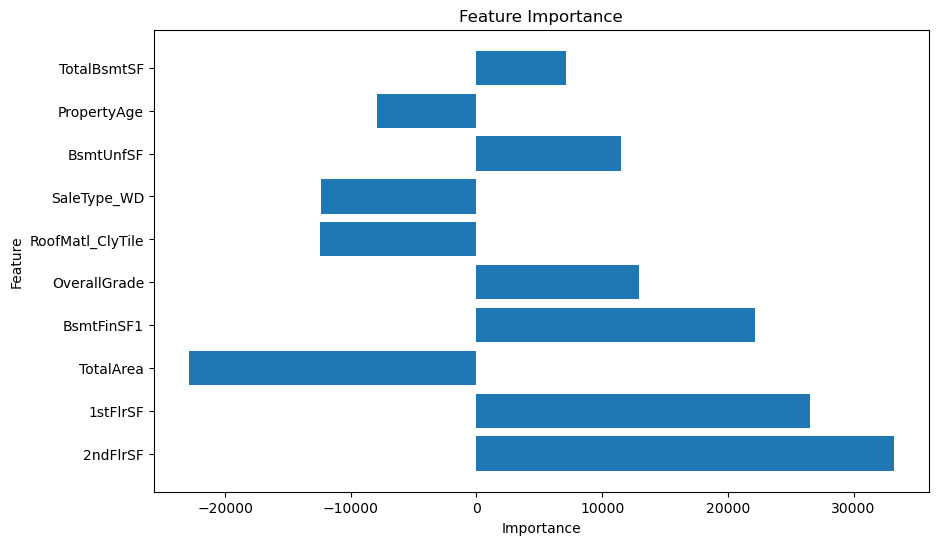

In [390]:
# Lasso Regression to see which features are important
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso(alpha=0.0005)

# Fit the model
lasso.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame(index=X_train.columns, data=lasso.coef_, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)
print(feature_importance.tail(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index[:10], feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [391]:
# Remove features with importance close to zero
features_to_remove = feature_importance[abs(feature_importance['Importance']) < 10].index
X_train = X_train.drop(features_to_remove, axis=1)
test = test.drop(features_to_remove, axis=1)

In [392]:
# Create a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the target
y_pred = rf.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print(f"Root Mean Squared Error: {mse ** 0.5}")

Root Mean Squared Error: 11135.068444603572


In [393]:
# Use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_rf = grid_search.best_estimator_

# Predict the target
y_pred = best_rf.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print(f"Root Mean Squared Error: {mse ** 0.5}")

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 10769.560382584437


In [394]:
# Try XGBoost
from xgboost import XGBRegressor

# Random search for hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Create a dictionary of hyperparameters to search
param_dist = {
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(1, 10),
    'learning_rate': stats.uniform(0.01, 0.3),
    'subsample': stats.uniform(0.5, 0.5),
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': stats.uniform(0, 10),
    'reg_alpha': stats.uniform(0, 10),
    'reg_lambda': stats.uniform(0, 10)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_xgb = random_search.best_estimator_

# Predict the target
y_pred = best_xgb.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print(f"Root Mean Squared Error: {mse ** 0.5}")

Best hyperparameters: {'colsample_bytree': 0.8560896106737679, 'gamma': 2.3724908749680007, 'learning_rate': 0.10761990944778031, 'max_depth': 4, 'n_estimators': 603, 'reg_alpha': 6.496328990472147, 'reg_lambda': 8.49223410494178, 'subsample': 0.8288064461501716}
Root Mean Squared Error: 3444.32478142137
